# Importing Library

In [159]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score

# Importing data

In [51]:
data=pd.read_excel("DS - Assignment Part 1 data set.xlsx")

# Exploring Data

In [52]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [53]:
print("No of records :- ",data.shape[0])
print("No of columns :- ",data.shape[1])

No of records :-  414
No of columns :-  9


In [54]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [55]:
data.tail()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [57]:
# In our dataset we have 9 columns and no null value
# All of our features are continous with float and integer data type.

In [58]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [59]:
# After looking at the statistical summary, we have a idea that "Distance from nearest Metro station (km)"
# might have outliers which we have to take care of

In [60]:
data.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


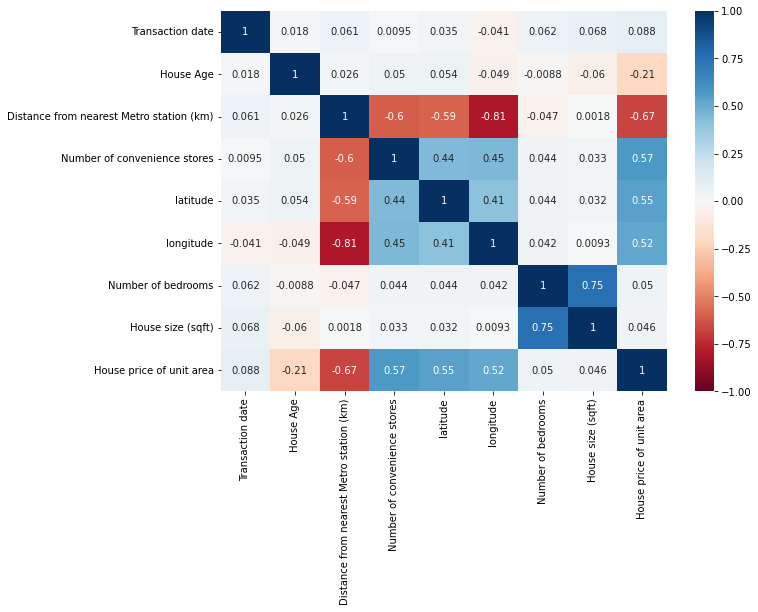

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

In [62]:
data.corr()['House price of unit area'].sort_values(ascending=True)

Distance from nearest Metro station (km)   -0.673613
House Age                                  -0.210567
House size (sqft)                           0.046489
Number of bedrooms                          0.050265
Transaction date                            0.087529
longitude                                   0.523287
latitude                                    0.546307
Number of convenience stores                0.571005
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

In [63]:
# here we can see that "House price of unit area" have strong correlation with most of the features
# which will be useful for us.

#  UNIVARIATE AND BI-VARIATE ANALYSIS

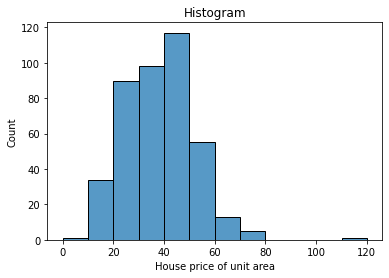

In [64]:
# explore target variable
sns.histplot(data['House price of unit area'],bins=np.arange(0,130,10))
plt.title("Histogram")
plt.show()

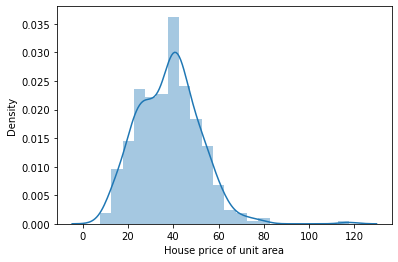

Skewness  0.5998525842660576
Kurtosis  2.1790970477396163


In [65]:
sns.distplot(data['House price of unit area'])
plt.show()
print('Skewness ',data['House price of unit area'].skew())
print('Kurtosis ',data['House price of unit area'].kurt())


In [66]:
# here we can see that our data is little bit rightskewed due to ouliers present
# kurtosis has value close to 2 and less than 3 so we will consider it platykurtic 

# outlier treatment in target feature

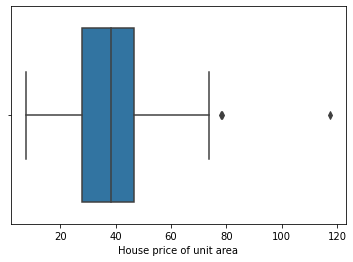

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House price of unit area, dtype: float64

In [67]:
sns.boxplot(data['House price of unit area'])
plt.show()
data['House price of unit area'].describe()

In [68]:
upper_bound=46.600000+1.5*(46.600000-27.700000)
upper_bound

74.95

<AxesSubplot:xlabel='House size (sqft)', ylabel='House price of unit area'>

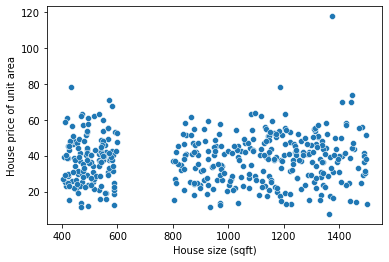

In [69]:
# here eveything is normal except house size lets see the price of all houses size above 1300(sqft)
sns.scatterplot(y='House price of unit area',x='House size (sqft)',data=data)

In [70]:
data[data["House price of unit area"]>upper_bound]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
220,2013.333333,37.2,186.5101,9,24.97703,121.54265,2,1187,78.3
270,2013.333333,10.8,252.5822,1,24.97460,121.53046,2,1373,117.5
312,2013.583333,35.4,318.5292,9,24.97071,121.54069,1,433,78.0


In [71]:
# here have only one outlier now we can drop it 
data=data.drop(index=[220,270,312])

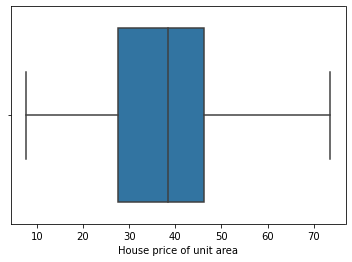

In [72]:
sns.boxplot(data['House price of unit area'])
plt.show()

<AxesSubplot:xlabel='Transaction date', ylabel='House price of unit area'>

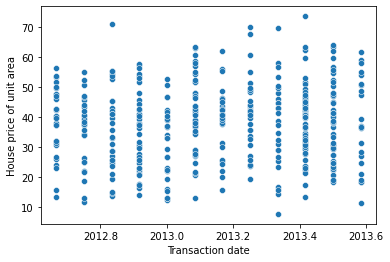

In [75]:
sns.scatterplot(y='House price of unit area',x='Transaction date',data=data)

In [78]:
value=np.median(data['Transaction date'])
price_a=data[data['Transaction date']<=value]['House price of unit area']
price_b=data[data['Transaction date']>value]['House price of unit area']

In [89]:
# H0-here is no difference in price of sample a and sample b
# H1- the two samples have difference in price.

z_score,p_value=ztest(price_a,price_b)
print('Z_SCORE: ',z_score)
print('P_VALUE: ',p_value)
if(p_value<0.05):
    print('Accept the H1 i.e, there is diffenece in price of sample a and sample b')
else:
    print("Accept the H0 i.e, there is no difference in price of both sample drawn.")


    print("Correlation b/w and 'House price of unit area' and 'Transaction date':- ",np.corrcoef(data['House price of unit area'],data['Transaction date'])[0][1])

Z_SCORE:  -1.5058599690463124
P_VALUE:  0.13210312476419103
Accept the H0 i.e, there is no difference in price of both sample drawn.
Correlation b/w and 'House price of unit area' and 'Transaction date':-  0.06701972972937202


In [90]:
# we have proved that house price have very low correlation withp- value greater than 0.05 
# we can drop this feature with of no sinificant use

In [91]:
data=data.drop(columns='Transaction date',axis=1)

In [93]:
data.head(2)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


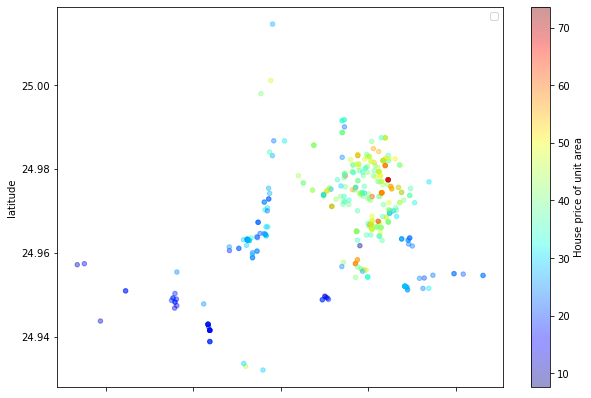

In [147]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 figsize=(10,7),c="House price of unit area", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [148]:
# here we can see that the houses in the northeast of the map have prices 

# Train Test  Split


In [149]:
X= data.drop(columns=['House price of unit area'])
y= data['House price of unit area']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [151]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(287, 7) (124, 7) (287,) (124,)


# Apply Machine Learning Alogrithms

## Linear Regression

In [152]:
model_lr=LinearRegression()

In [153]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [154]:
model_lr.coef_

array([-2.83011630e-01, -4.02768408e-03,  1.15346493e+00,  2.26826955e+02,
        1.04265696e+00,  3.24217385e-01, -9.89855848e-04])

In [155]:
model_lr.intercept_

-5747.417370588003

In [156]:
pred_y=model_lr.predict(x_test)

In [229]:
print([p for p in range(2,201) if not [q for q in range(2, p-1) if not p%q]])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]


# function for validation

In [198]:
def validation(test,pred,data):
    r2=r2_score(test,pred)
    n=data_scaled.shape[0]
    k=data_scaled.shape[1]
    adj_2=1-(((n-1)/(n-k-1))*(1-r2))
    
    print("R Square :",r2)
    print("Adj. R Square :",adj_2)
    print("Mean Square Error :",mean_squared_error(test,pred))
    print("Root Mean Square Error :",(mean_squared_error(test,pred)**0.5))
    print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(test,pred))
          
    Mat= [r2,adj_2,mean_squared_error(test,pred),mean_squared_error(test,pred)**0.5,mean_absolute_percentage_error(test,pred)]
    return Mat

## Others Models

In [199]:
validation_dict={}
def different_model(model):
    ml=model()
    
    ml.fit(x_train,y_train)
    
    pred_y = ml.predict(x_test)
    
    return_list=validation(y_test,pred_y,data)
    validation_dict[model]=return_list

In [227]:
# Linear Regression
different_model(LinearRegression)

R Square : 0.6698985391093779
Adj. R Square : 0.663329355808072
Mean Square Error : 39.40479103918291
Root Mean Square Error : 6.2773235569932915
Mean Absolute Percentage Error : 0.14559791385470075


In [200]:
# Decision Tree
different_model(DecisionTreeRegressor)

R Square : 0.38677745828659016
Adj. R Square : 0.3745740246206517
Mean Square Error : 73.20145161290324
Root Mean Square Error : 8.555784687151919
Mean Absolute Percentage Error : 0.17831446263820097


In [201]:
# Random Forest
different_model(RandomForestRegressor)

R Square : 0.7660478000230264
Adj. R Square : 0.7613920348493554
Mean Square Error : 27.92728492741935
Root Mean Square Error : 5.284627226911975
Mean Absolute Percentage Error : 0.125650994133705


In [202]:
# Support Vector Machine
different_model(SVR)

R Square : 0.5411190233892564
Adj. R Square : 0.5319870636557094
Mean Square Error : 54.777427965379324
Root Mean Square Error : 7.401177471550005
Mean Absolute Percentage Error : 0.16009480783576116


In [203]:
# K- Nearest Neighbour
different_model(KNeighborsRegressor)

R Square : 0.6241614062418311
Adj. R Square : 0.6166820312416685
Mean Square Error : 44.8645129032258
Root Mean Square Error : 6.698097707799268
Mean Absolute Percentage Error : 0.14702610929936377


In [209]:
Error_Table=pd.DataFrame(validation_dict)

In [220]:
Error_Table.columns=['DT','RF','SVR','KNN','LR']

In [222]:
Error_Table=Error_Table.T

In [225]:
Error_Table.columns=['R-Squared','Adj-R-Squared','MSE','RSME','MAPE']

In [226]:
Error_Table

,R-Squared,Adj-R-Squared,MSE,RSME,MAPE
DT,0.386777,0.374574,73.201452,8.555785,0.178314
RF,0.766048,0.761392,27.927285,5.284627,0.125651
SVR,0.541119,0.531987,54.777428,7.401177,0.160095
KNN,0.624161,0.616682,44.864513,6.698098,0.147026
LR,0.669899,0.663329,39.404791,6.277324,0.145598


In [183]:
# here we can see that our Random Forest and Linear Regression are top performing Models

# Hypertuining of Random Forest

R Square : 0.6698985391093779
Adj. R Square : 0.663329355808072
Mean Square Error : 39.40479103918291
Root Mean Square Error : 6.2773235569932915
Mean Absolute Percentage Error : 0.14559791385470075


[0.6698985391093779,
 0.663329355808072,
 39.40479103918291,
 6.2773235569932915,
 0.14559791385470075]